# Airbnb data analysis

In [1]:
#importing libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Airbnb.csv") # importing data

In [3]:
df.dropna(axis=0,inplace=True) # eliminating duplicate values

In [4]:
df.isna().any() # checking for null values

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [5]:
df.to_csv("airbnbFiltered.csv") # saving the cleaned data to storage

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [7]:
#1) Find Distribution Of Airbnb Bookings Price Range.
abs(df["price"].min() - df["price"].max())

10000

In [8]:
#(2) Find Total Listing/Property count in Each Neighborhood Group in NYC.
group = df.groupby("neighbourhood_group")["calculated_host_listings_count"].count()
group

neighbourhood_group
Bronx              875
Brooklyn         16439
Manhattan        16621
Queens            4572
Staten Island      314
Name: calculated_host_listings_count, dtype: int64

In [9]:
#3) Find Average Price Of listings/property in each Neighborhood Groups and also Neighborhoods.
# in neighbourhood groups 
grp = df.groupby("neighbourhood_group")["price"].mean()
print(grp,"\n")
gr= df.groupby("neighbourhood")["price"].mean()
print(gr)

neighbourhood_group
Bronx             79.558857
Brooklyn         121.463289
Manhattan        180.071596
Queens            95.783683
Staten Island     89.964968
Name: price, dtype: float64 

neighbourhood
Allerton            90.594595
Arden Heights       67.250000
Arrochar           118.250000
Arverne            158.515152
Astoria            116.018336
                      ...    
Willowbrook        249.000000
Windsor Terrace    130.687500
Woodhaven           62.722222
Woodlawn            60.090909
Woodside            89.852941
Name: price, Length: 218, dtype: float64


In [10]:
#(4) Find Top Neighborhoods and Hosts by Listing/property in NYC.
grp = df.sort_values("number_of_reviews",ascending=False).loc[:,["neighbourhood","host_name","number_of_reviews"]]
grp.head(50)


,neighbourhood,host_name,number_of_reviews
11759,Jamaica,Dona,629
2031,Harlem,Jj,607
2030,Harlem,Jj,597
2015,Harlem,Jj,594
13495,Jamaica,Dona,576
10623,East Elmhurst,Maya,543
1879,Lower East Side,Carol,540
20403,East Elmhurst,Danielle,510
4870,Park Slope,Asa,488
471,Bushwick,Wanda,480


In [11]:
#5) Find the Number Of Active Hosts Per Location by Each Neighborhood Groups.
grp = df.groupby("neighbourhood_group")
for i in grp:
    print("---------\n",i[0])
    grp1 = i[1].groupby("neighbourhood")
    for j in grp1:
        print(j[0],"{}".format(j[1]["host_id"].count()))
    

---------
 Bronx
Allerton 37
Baychester 6
Belmont 20
Bronxdale 16
Castle Hill 2
City Island 15
Claremont Village 16
Clason Point 18
Co-op City 2
Concourse 41
Concourse Village 24
East Morrisania 10
Eastchester 10
Edenwald 9
Fieldston 12
Fordham 47
Highbridge 22
Hunts Point 16
Kingsbridge 54
Longwood 47
Melrose 7
Morris Heights 12
Morris Park 13
Morrisania 7
Mott Haven 53
Mount Eden 5
Mount Hope 18
North Riverdale 6
Norwood 24
Olinville 2
Parkchester 32
Pelham Bay 13
Pelham Gardens 25
Port Morris 38
Riverdale 7
Schuylerville 13
Soundview 13
Spuyten Duyvil 4
Throgs Neck 21
Tremont 10
Unionport 5
University Heights 17
Van Nest 9
Wakefield 41
West Farms 2
Westchester Square 9
Williamsbridge 34
Woodlawn 11
---------
 Brooklyn
Bath Beach 15
Bay Ridge 115
Bedford-Stuyvesant 3141
Bensonhurst 61
Bergen Beach 8
Boerum Hill 147
Borough Park 110
Brighton Beach 59
Brooklyn Heights 124
Brownsville 55
Bushwick 1942
Canarsie 135
Carroll Gardens 198
Clinton Hill 480
Cobble Hill 88
Columbia St 35
Coney 

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64


<BarContainer object of 3 artists>

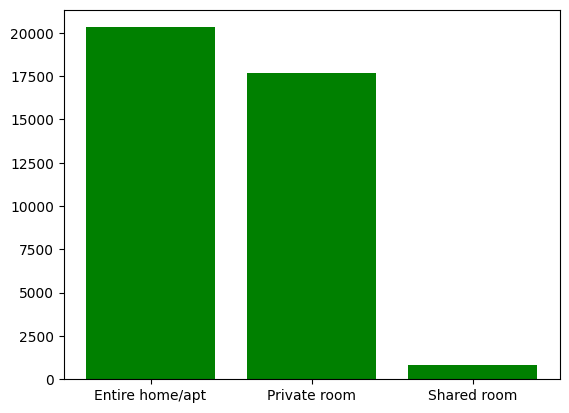

In [12]:
#(6) Find Total Counts Of Each Room Types in the entire NYC.
grp = df.groupby("room_type")["room_type"].count()
print(grp)
plt.bar(x = grp.index,height = grp, color = "g")

In [13]:
# 7) Find Stay Requirement counts by Minimum Nights.
grp = df.groupby("minimum_nights")
for i in grp:
    print("        -->",i[0],"\n\n",i[1]["name"].head())

        --> 1 

 0     Clean & quiet apt home by the park
1                  Skylit Midtown Castle
3        Cozy Entire Floor of Brownstone
9     Cute & Cozy Lower East Side 1 bdrm
17                       Chelsea Perfect
Name: name, dtype: object
        --> 2 

 7                     Large Furnished Room Near B'way 
8                   Cozy Clean Guest Room - Family Apt
11                     Central Manhattan/near Broadway
13    Wonderful Guest Bedroom in Manhattan for SINGLES
15                    Only 2 stops to Manhattan studio
Name: name, dtype: object
        --> 3 

 5           Large Cozy 1 BR Apartment In Midtown East
18    Hip Historic Brownstone Apartment with Backyard
20                   Sweet and Spacious Brooklyn Loft
28       SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM
30                              front room/double bed
Name: name, dtype: object
        --> 4 

 12     Lovely Room 1, Garden, Best Area, Legal rental
32                  Loft in Williamsburg Area w/ R

In [14]:
# (8) Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.
grp = df.groupby("neighbourhood_group")
print(grp["number_of_reviews"].count())
for i in grp:
    print(i[0],i[1]["number_of_reviews"].max())

neighbourhood_group
Bronx              875
Brooklyn         16439
Manhattan        16621
Queens            4572
Staten Island      314
Name: number_of_reviews, dtype: int64
Bronx 321
Brooklyn 488
Manhattan 607
Queens 629
Staten Island 333


In [15]:
# (9) Find Most reviewed room type in Neighborhood groups per month.
grp = df.groupby("neighbourhood_group")
for i in grp:
    print(i[0],"\n",i[1].sort_values("reviews_per_month",ascending=False).loc[:,["room_type","reviews_per_month"]].head(1))
    

Bronx 
              room_type  reviews_per_month
23371  Entire home/apt              10.34
Brooklyn 
           room_type  reviews_per_month
44764  Private room               14.0
Manhattan 
           room_type  reviews_per_month
42075  Private room               58.5
Queens 
           room_type  reviews_per_month
38870  Private room              20.94
Staten Island 
           room_type  reviews_per_month
35186  Private room              10.12


In [16]:
# (10) Find Best location listing/property location for travelers.
print(df.sort_values("price")["neighbourhood"].head(1))

23161    Bedford-Stuyvesant
Name: neighbourhood, dtype: object


In [17]:
# (11) Find also the best location listing/property location for Hosts.
df.sort_values("calculated_host_listings_count",ascending=False).loc[:,"neighbourhood"].unique()[:5]

array(['Financial District', 'Upper East Side', 'Murray Hill',
       "Hell's Kitchen", 'Theater District'], dtype=object)

Bronx 
 price range from 0 to 800
Brooklyn 
 price range from 0 to 10000
Manhattan 
 price range from 10 to 9999
Queens 
 price range from 10 to 10000
Staten Island 
 price range from 13 to 625


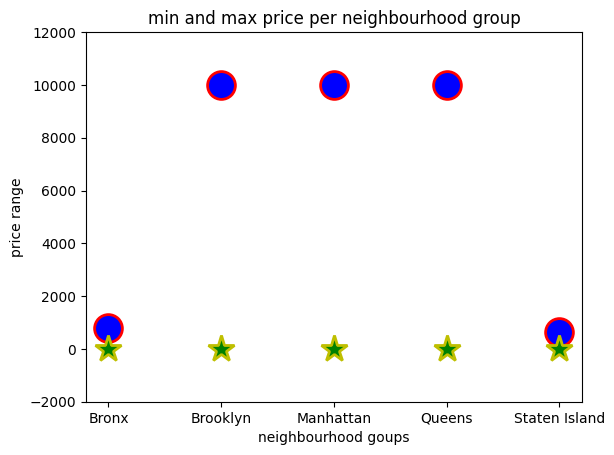

In [18]:
# (12) Find Price variations in NYC Neighborhood groups.

grp = df.groupby("neighbourhood_group")
plt.ylim(-2000,12000)
plt.title("min and max price per neighbourhood group")
plt.ylabel("price range")
plt.xlabel("neighbourhood goups")
for i in grp:
    plt.plot(i[0],i[1]["price"].max(),"-o",markersize=20,markerfacecolor="b",markeredgecolor="r",markeredgewidth=2,label="max price")
    plt.plot(i[0],i[1]["price"].min(),"*",markersize=20,markerfacecolor="g",markeredgecolor="y",markeredgewidth=2,label="min price")
    # plt.legend()
    print(i[0],"\n price range from {} to {}".format(i[1]["price"].min(),i[1]["price"].max()))

In [19]:
# listing by neighbourhoods
d = df["neighbourhood"].value_counts().head(10)
print(d)

neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
East Village          1489
Upper West Side       1482
Upper East Side       1405
Crown Heights         1265
Midtown                986
Name: count, dtype: int64


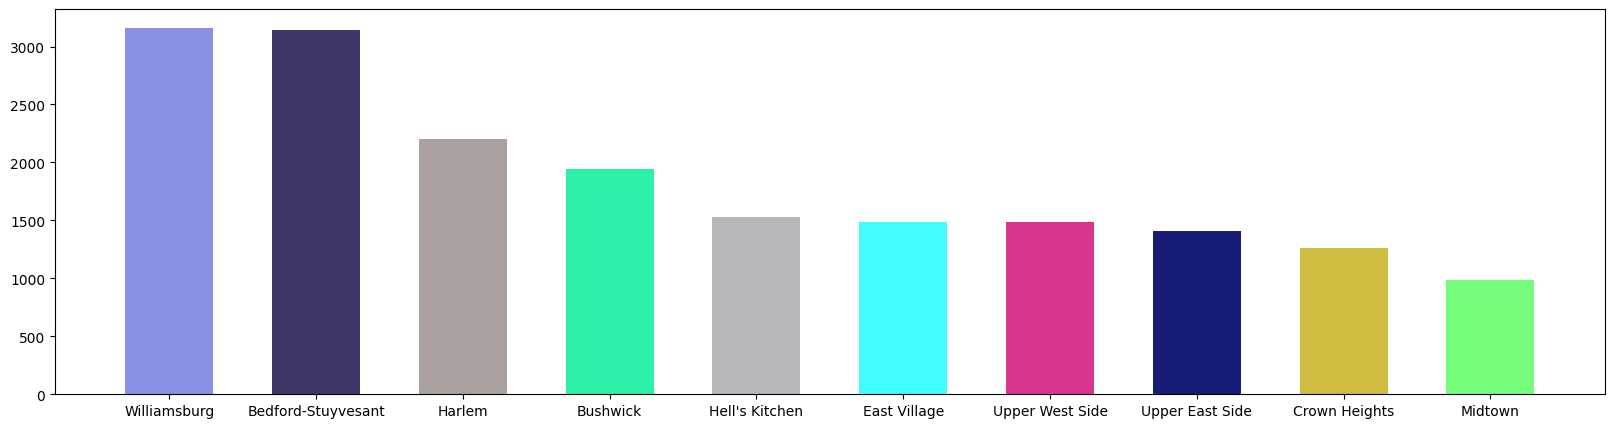

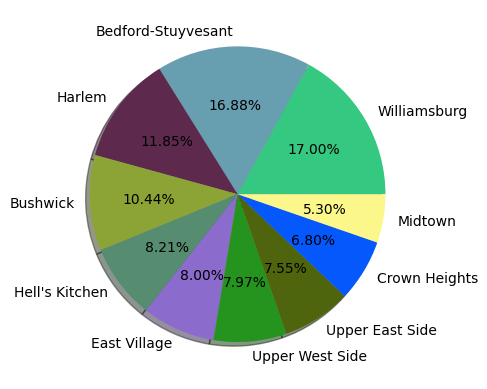

In [20]:
%matplotlib inline
import numpy as np
def Rcolors(n):
    lst=[]
    for x,y,z in zip(np.random.rand(n),np.random.rand(n),np.random.rand(n)):
        lst.append([x,y,z])
    return lst
plt.figure(figsize=(20,5))
plt.bar(d.index,d.values,color = Rcolors(10),width=0.6)
plt.show()
plt.pie(d.values,labels=d.index,colors = Rcolors(10),autopct = "%1.2f%%",shadow= True)
plt.show()